## Basic Concept
Any function of the form $f(x \pm vt)$ describes a propagating wave as a function of time and distance. A particularly useful form is a *harmonic* or sinusoidal wave:
$$ 
u(x,t) = Ae^{i(wt \pm kx)} = A \cos (wt \pm kx) + A i \sin (wt \pm kx).
$$
To understand the harmonic wave solution, consider the wave given by the real part of $u(x,t)$, which is $A\cos (wt-kx)$.

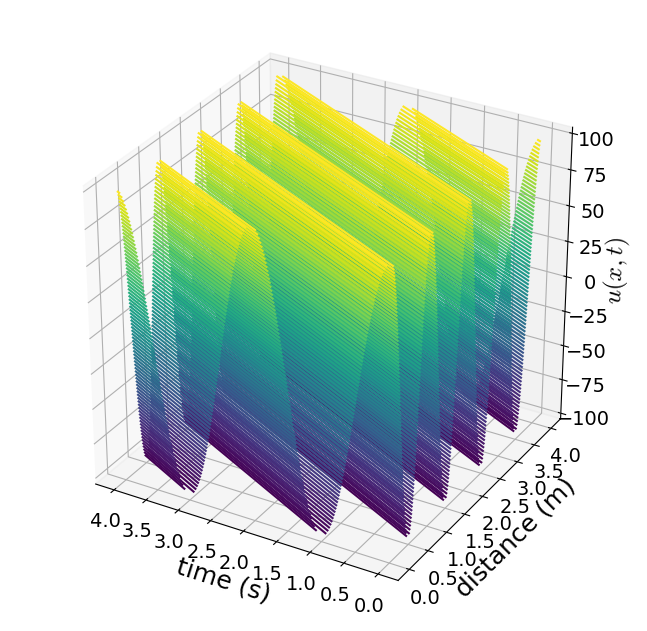

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['mathtext.fontset'] = 'cm'

T0 = 0      # beginning time in s
TF = 4      # ending time in s
DT = 0.01    # time step

X0 = 0      # starting distance in m
XF = 4      # ending distance in m
DX = 0.01    # distance time step in m

OMEGA = np.pi       # angular frequency in s^(-1)
k = 2 * np.pi       # wavenumber in m^(-1)
A = 100             # amplitude of the harmonic function


T = np.arange(T0, TF+DT, DT)
X = np.arange(X0, XF+DX, DX)

TT, XX = np.meshgrid(T, X)

U = A * np.cos(OMEGA * TT - k * XX)

# plot the harmonic function
FIG = plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
AX = plt.gca(projection=Axes3D.name)
AX.contour3D(TT, XX, U, 80)
AX.set_xlabel(r'time (s)', fontsize=18)
AX.set_ylabel(r'distance (m)', fontsize=18)
AX.set_zlabel(r'$u(x,t)$', fontsize=18)
AX.tick_params(labelsize=14)
AX.invert_xaxis()
plt.show()

## Fixed point in space
Additional insight comes by examining $u(x,t)$ at a point space, $x_0$. This is a slice of the function on a plane parallel to the time axis, which intersects the distance axis at $x_0$. This gives a periodic function of time, $u(x_0,t) = A \cos (\omega t - k x_0)$. Because the function returns to the same value when $\omega t$ changes by $2 \pi$, the oscillation is characterized by the *period*, $T=2\pi / \omega$, the time over which it repeats. The periodicity can also be described by the *frequency*, $f=1/T=\omega /(2 \pi)$, the number of oscillations within a unit time, or by the *angular frequency*, $\omega = 2 \pi f$. In this example, $u(x,t) = A \cos (\pi t - 2 \pi x)$, so the angular frequency is $\pi$ s<sup>-1</sup>, the frequency is $1/2$ s<sup>-1</sup>, and the period is 2 s.

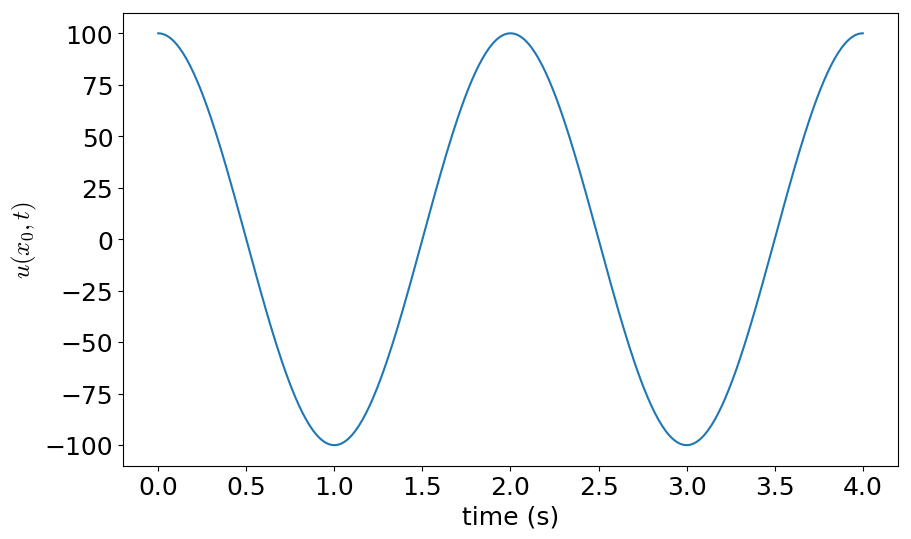

In [2]:
# Additional insight comes by examining u(x,t) at a point in space x0.
UX0 = A * np.cos(OMEGA * T - k * X0)
FIG2 = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(T, UX0)
plt.xlabel(r'time (s)', fontsize=18)
plt.ylabel(r"$u(x_0, t)$", fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

## Fixed point in time
Alternatively, we can examine $u(x,t)$ at a fixed time, $t_0$, and plot $u(x,t_0)=A \cos(\omega t_0 - kx)$ as a function of position. This is a slice of the function on a plane parallel to the distance axis, which intersects the time axis at $t_0$. The displacement is periodic in space over a distance equal to the *wavelength*, $\lambda = 2 \pi / k$, the distance between two corresponding points in a cycle. How the oscillation repeats in space can also be described by $k$, the *wavenumber* or *spatial frequency*, which is $2 \pi$ times the number of cycles occurring in unit distance. In this example, the wavelength is 1 m and the wavenumber is $2 \pi$ m<sup>-1</sup>.

Note that the wavelength and wavenumber are analogous, for constant time, to the period and angular frequency for constant $x$.

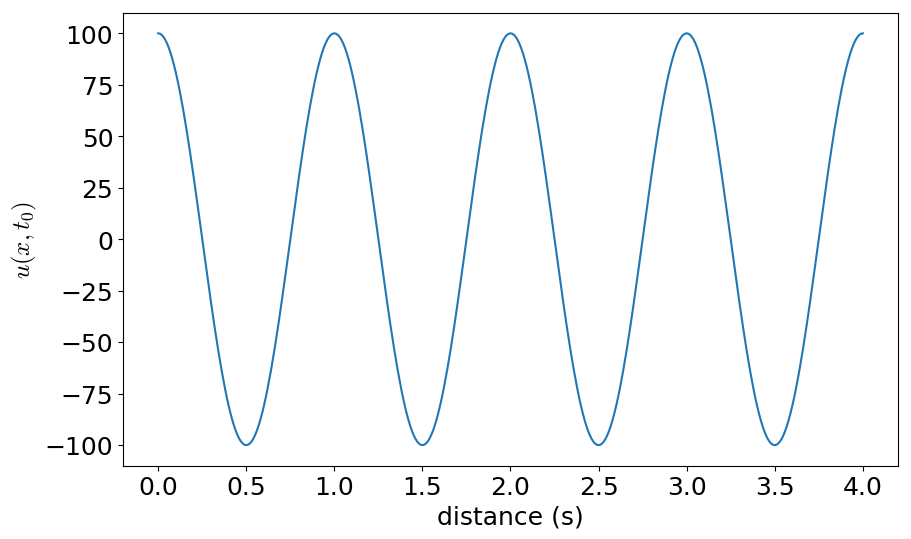

In [3]:
# Alternatively, we can examine u(x,t) at a fixed time, t0, and plot u(x,t0)
UT0 = A * np.cos(OMEGA * T0 - k * X)
FIG3 = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(X, UT0)
plt.xlabel(r'distance (s)', fontsize=18)
plt.ylabel(r"$u(x, t_0)$", fontsize=18)
plt.tick_params(labelsize=18)
plt.show()